In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df = pd.read_csv('HREP/crawled.csv')
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,6.8 Tỷ,41 m²,Nhà trong ngõ,Quận Thanh Xuân,NaN,NaN,NaN,NaN,NaN,NaN
1,5.9 Tỷ,45 m²,Nhà trong ngõ,Quận Thanh Xuân,NaN,NaN,NaN,NaN,NaN,NaN
2,10.7 Tỷ,48 m²,Nhà mặt phố,Quận Ba Đình,NaN,NaN,NaN,NaN,NaN,NaN
3,11 Tỷ,52 m²,Nhà mặt phố,Quận Cầu Giấy,NaN,NaN,NaN,NaN,NaN,NaN
4,40 Tỷ,145 m²,Nhà mặt phố,Quận Thanh Xuân,NaN,NaN,8 tầng,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          14643 non-null  object
 1   area           15120 non-null  object
 2   type           15120 non-null  object
 3   district       15120 non-null  object
 4   road_width     10499 non-null  object
 5   width          11640 non-null  object
 6   floors         12932 non-null  object
 7   parking_slots  4281 non-null   object
 8   bedrooms       11094 non-null  object
 9   bathrooms      9557 non-null   object
dtypes: object(10)
memory usage: 1.2+ MB


In [30]:
df = df.loc[df['price'].notnull()]
df.drop(columns=['bathrooms'], inplace=True)


def fix_price(x):
    x = x.split()
    if x[1] == 'Tỷ':
        return round(float(x[0]), 2)
    else:
        return round(float(x[0]) / 1000, 2)
    
def fix_parking(x):
    if x.lower() == 'nan' or not x:
        return 0
    else:
        return int(x.split()[0])
    
df['price'] = df['price'].apply(fix_price)
df['parking_slots'] = df['parking_slots'].apply(str).apply(fix_parking)
df.dropna(inplace=True)
df['area'] = df['area'].apply(lambda x: float(x.split()[0]))
df['road_width'] = df['road_width'].apply(str).apply(lambda x: float(x.split()[-1][:-1]))
df['width'] = df['width'].apply(str).apply(lambda x: float(x.split()[-1][:-1]))
df['floors'] = df['floors'].apply(str).apply(lambda x: float(x.split()[0]))
df['bedrooms'] = df['bedrooms'].apply(str).apply(lambda x: int(x.split()[0]))
df.reset_index(drop=True, inplace=True)
df

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms
0,4.80,34.0,Nhà trong ngõ,Quận Hà Đông,3.0,4.0,5.0,1,4
1,3.90,34.0,Nhà trong ngõ,Quận Hà Đông,3.0,3.7,5.0,1,4
2,3.20,40.0,Nhà trong ngõ,Quận Hà Đông,3.0,3.8,4.0,1,4
3,4.30,38.0,Nhà trong ngõ,Quận Hà Đông,3.0,5.0,5.0,1,4
4,4.25,35.0,Nhà mặt phố,Quận Hà Đông,4.0,3.2,4.0,1,4
...,...,...,...,...,...,...,...,...,...
8426,3.30,44.0,Nhà trong ngõ,Quận Long Biên,5.0,6.0,5.0,0,3
8427,6.50,55.0,Nhà trong ngõ,Quận Cầu Giấy,6.0,4.0,5.0,0,5
8428,19.00,90.0,Nhà trong ngõ,Quận Cầu Giấy,6.0,4.6,5.0,2,6
8429,14.00,46.0,Nhà mặt phố,Quận Long Biên,40.0,4.0,4.0,4,5


In [31]:
df = pd.get_dummies(df, columns=['type', 'district'], drop_first=True)

# df = df.drop(columns='district')
df

,price,area,road_width,width,floors,parking_slots,bedrooms,type_Nhà trong ngõ,district_Quận Bắc Từ Liêm,district_Quận Cầu Giấy,district_Quận Hai Bà Trưng,district_Quận Hoàn Kiếm,district_Quận Hoàng Mai,district_Quận Hà Đông,district_Quận Long Biên,district_Quận Nam Từ Liêm,district_Quận Thanh Xuân,district_Quận Tây Hồ,district_Quận Đống Đa
0,4.80,34.0,3.0,4.0,5.0,1,4,1,0,0,0,0,0,1,0,0,0,0,0
1,3.90,34.0,3.0,3.7,5.0,1,4,1,0,0,0,0,0,1,0,0,0,0,0
2,3.20,40.0,3.0,3.8,4.0,1,4,1,0,0,0,0,0,1,0,0,0,0,0
3,4.30,38.0,3.0,5.0,5.0,1,4,1,0,0,0,0,0,1,0,0,0,0,0
4,4.25,35.0,4.0,3.2,4.0,1,4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8426,3.30,44.0,5.0,6.0,5.0,0,3,1,0,0,0,0,0,0,1,0,0,0,0
8427,6.50,55.0,6.0,4.0,5.0,0,5,1,0,1,0,0,0,0,0,0,0,0,0
8428,19.00,90.0,6.0,4.6,5.0,2,6,1,0,1,0,0,0,0,0,0,0,0,0
8429,14.00,46.0,40.0,4.0,4.0,4,5,0,0,0,0,0,0,0,1,0,0,0,0


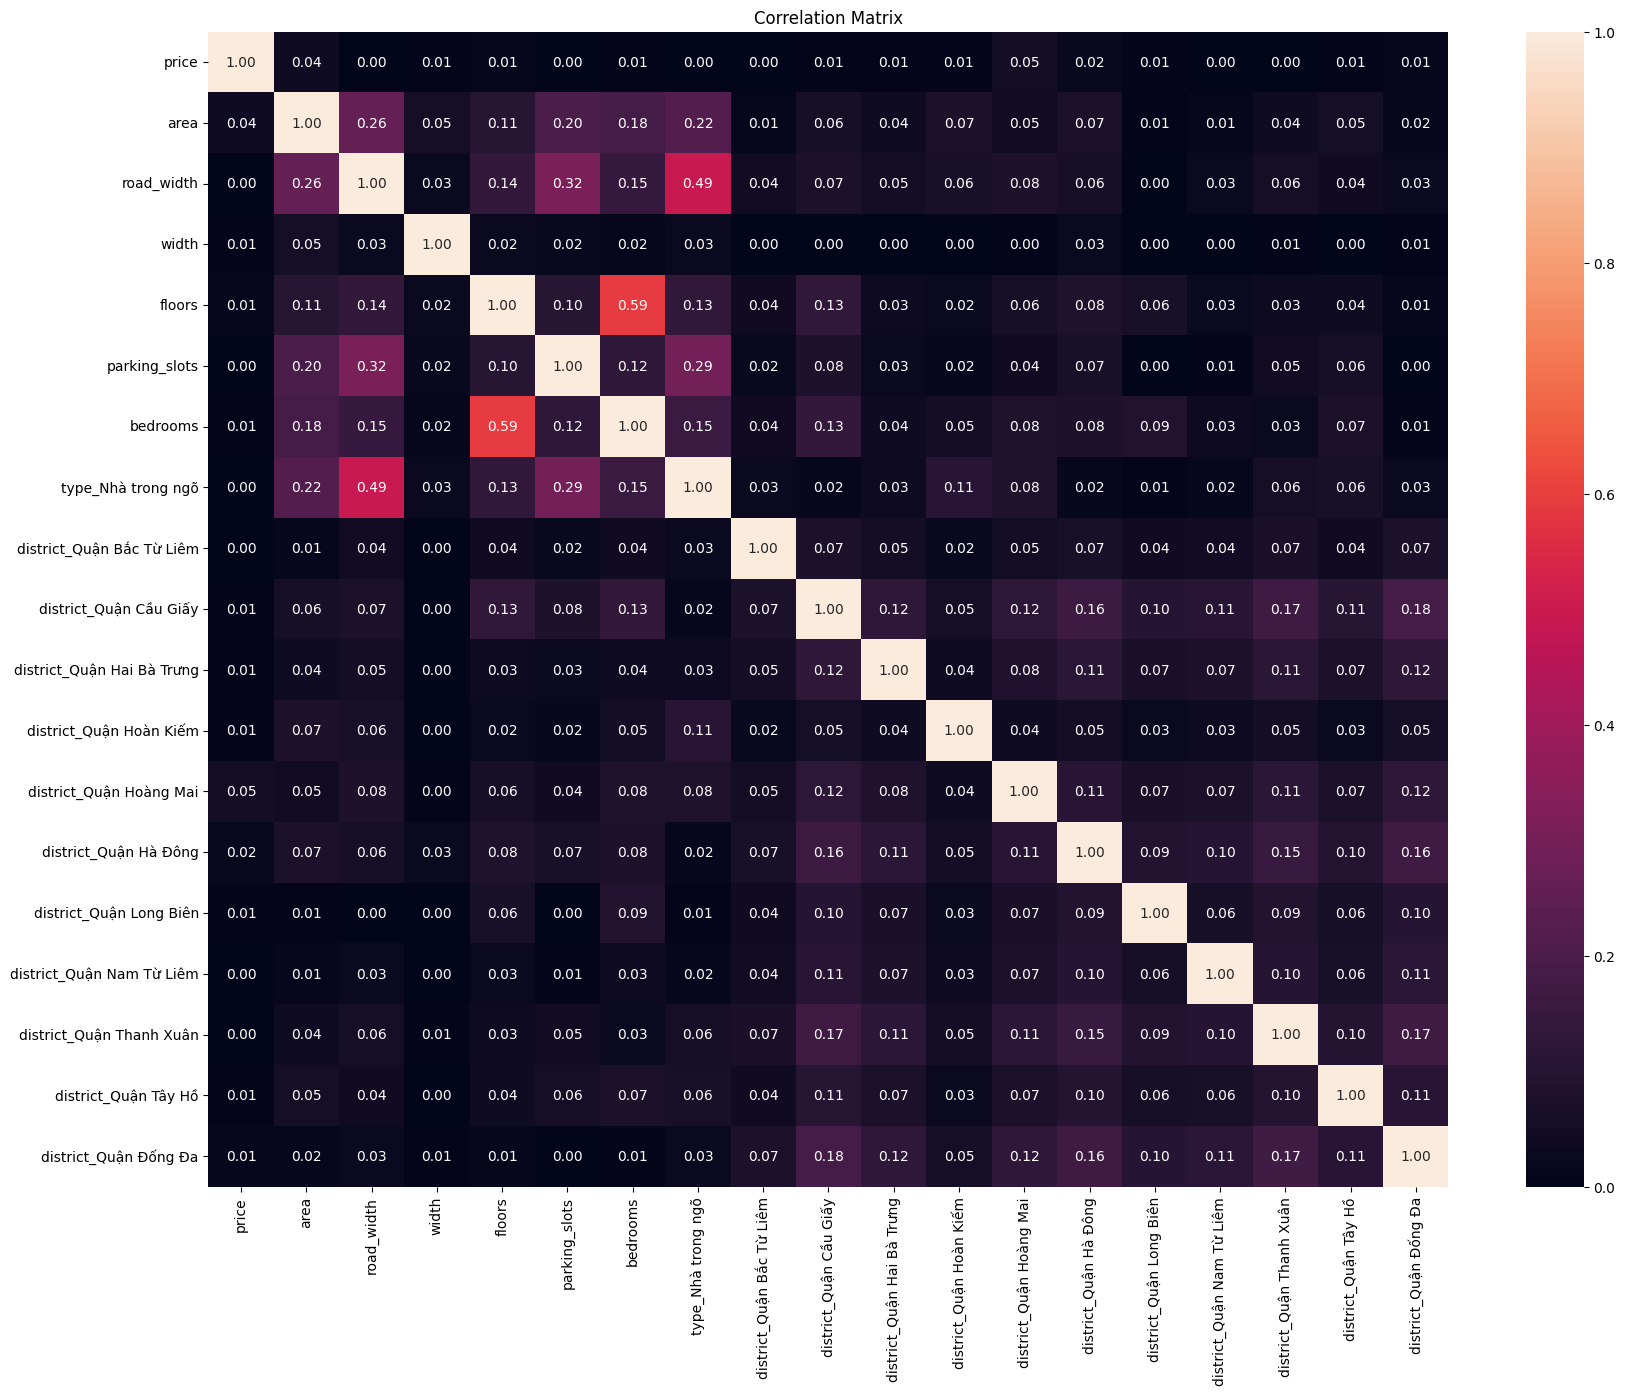

In [32]:
correlation_matrix = abs(df.corr())

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10}, fmt='.2f', vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()


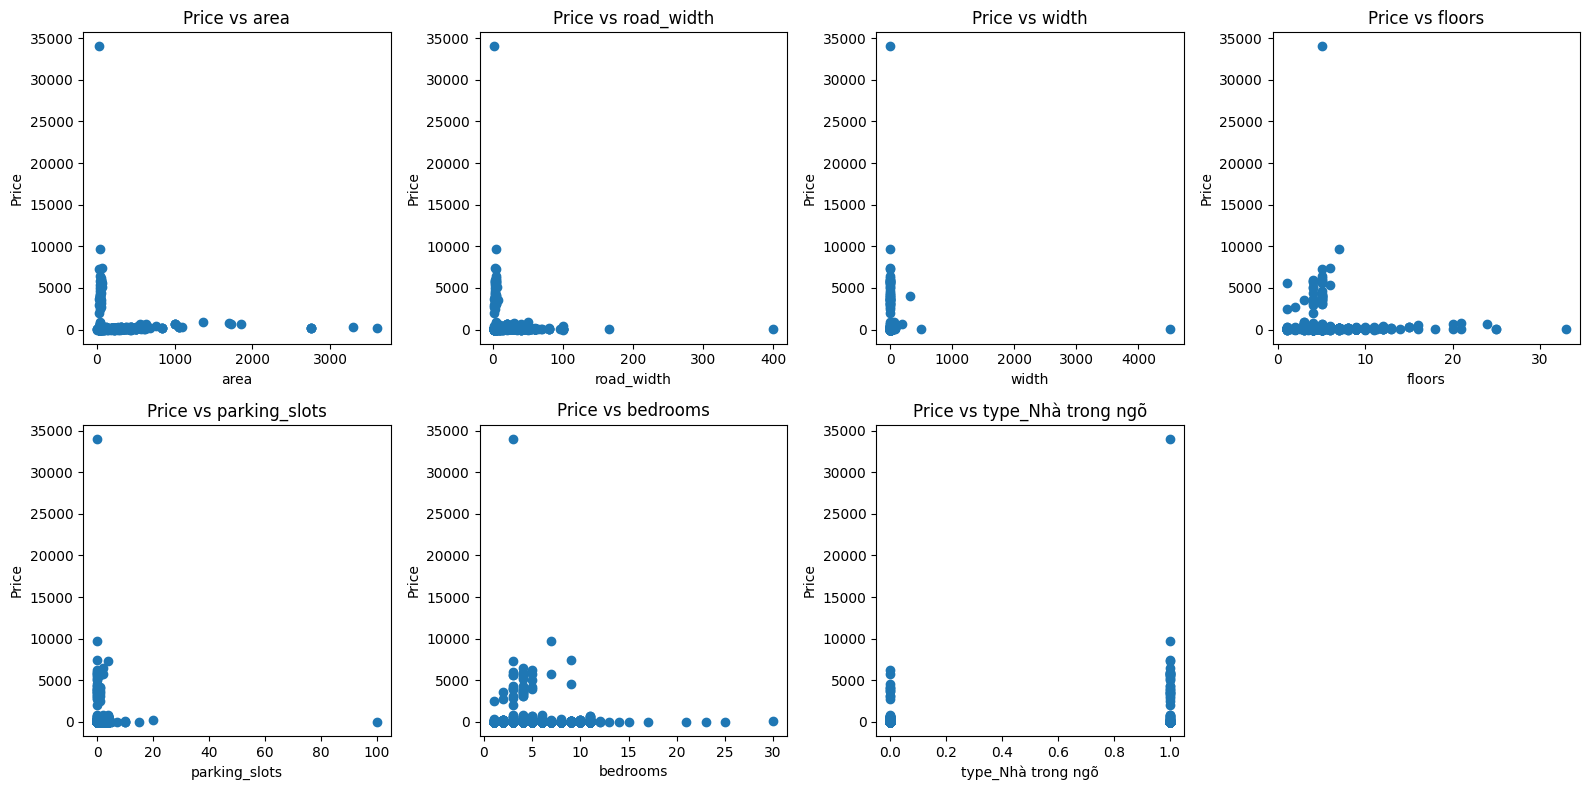

In [33]:
num_cols_to_plot = 7
fig = plt.figure(figsize=(16, 8))

for i in range(num_cols_to_plot):
    row = i // 4
    col = i % 4
    ax = fig.add_subplot(2, 4, i + 1)
    ax.scatter(df[df.columns[i + 1]], df['price'])
    ax.set_xlabel(df.columns[i + 1])
    ax.set_ylabel('Price')
    ax.set_title(f"Price vs {df.columns[i + 1]}")

plt.tight_layout()
plt.show()


In [34]:
df.iloc[:, 0:7].describe()

,price,area,road_width,width,floors,parking_slots,bedrooms
count,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000
mean,41.253478,69.821503,8.824353,5.959663,4.806132,0.999170,4.622821
std,495.600917,108.390802,11.222119,49.577388,1.676559,1.837367,2.294988
min,0.010000,3.300000,0.900000,1.000000,1.000000,0.000000,1.000000
25%,4.000000,39.000000,3.000000,4.000000,4.000000,0.000000,3.000000
50%,6.600000,50.000000,5.000000,4.400000,5.000000,0.000000,4.000000
75%,14.500000,70.000000,10.000000,5.450000,5.000000,1.000000,5.000000
max,34000.000000,3600.000000,400.000000,4500.000000,33.000000,100.000000,30.000000


In [35]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import Normalizer
lof = LocalOutlierFactor(n_neighbors=200, contamination=0.1)  

outlier_scores = lof.fit_predict((df[['price', 'road_width', 'width']]))

outlier_indices = [i for i, score in enumerate(outlier_scores) if score == -1]
outliers_df = df.iloc[outlier_indices]

df = df.drop(outlier_indices, axis=0)

print(f"Number of outliers detected: {len(outlier_indices)}")
print(f"Cleaned data shape: {df.shape}")
outliers_df


Number of outliers detected: 842
Cleaned data shape: (7589, 19)


,price,area,road_width,width,floors,parking_slots,bedrooms,type_Nhà trong ngõ,district_Quận Bắc Từ Liêm,district_Quận Cầu Giấy,district_Quận Hai Bà Trưng,district_Quận Hoàn Kiếm,district_Quận Hoàng Mai,district_Quận Hà Đông,district_Quận Long Biên,district_Quận Nam Từ Liêm,district_Quận Thanh Xuân,district_Quận Tây Hồ,district_Quận Đống Đa
29,3.85,40.0,3.0,8.0,4.0,0,3,1,0,0,0,0,0,1,0,0,0,0,0
35,4.95,40.0,6.0,6.4,5.0,1,4,1,0,0,0,0,0,1,0,0,0,0,0
61,13.40,52.0,5.0,12.0,7.0,2,6,0,0,1,0,0,0,0,0,0,0,0,0
95,66.00,76.0,60.0,5.9,7.0,4,7,0,0,0,0,0,0,0,0,0,0,0,1
97,68.00,100.0,60.0,6.5,10.0,4,11,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,15.50,100.0,8.0,10.0,6.0,0,8,0,0,0,0,0,0,0,0,0,0,1,0
8404,3.15,45.0,4.5,7.3,5.0,0,4,1,0,0,0,0,0,0,0,1,0,0,0
8408,5.60,38.0,2.0,8.5,5.0,0,3,1,0,0,0,0,0,0,0,0,0,0,1
8419,8.80,127.0,3.5,8.7,3.0,0,3,1,0,0,0,0,0,0,0,0,1,0,0


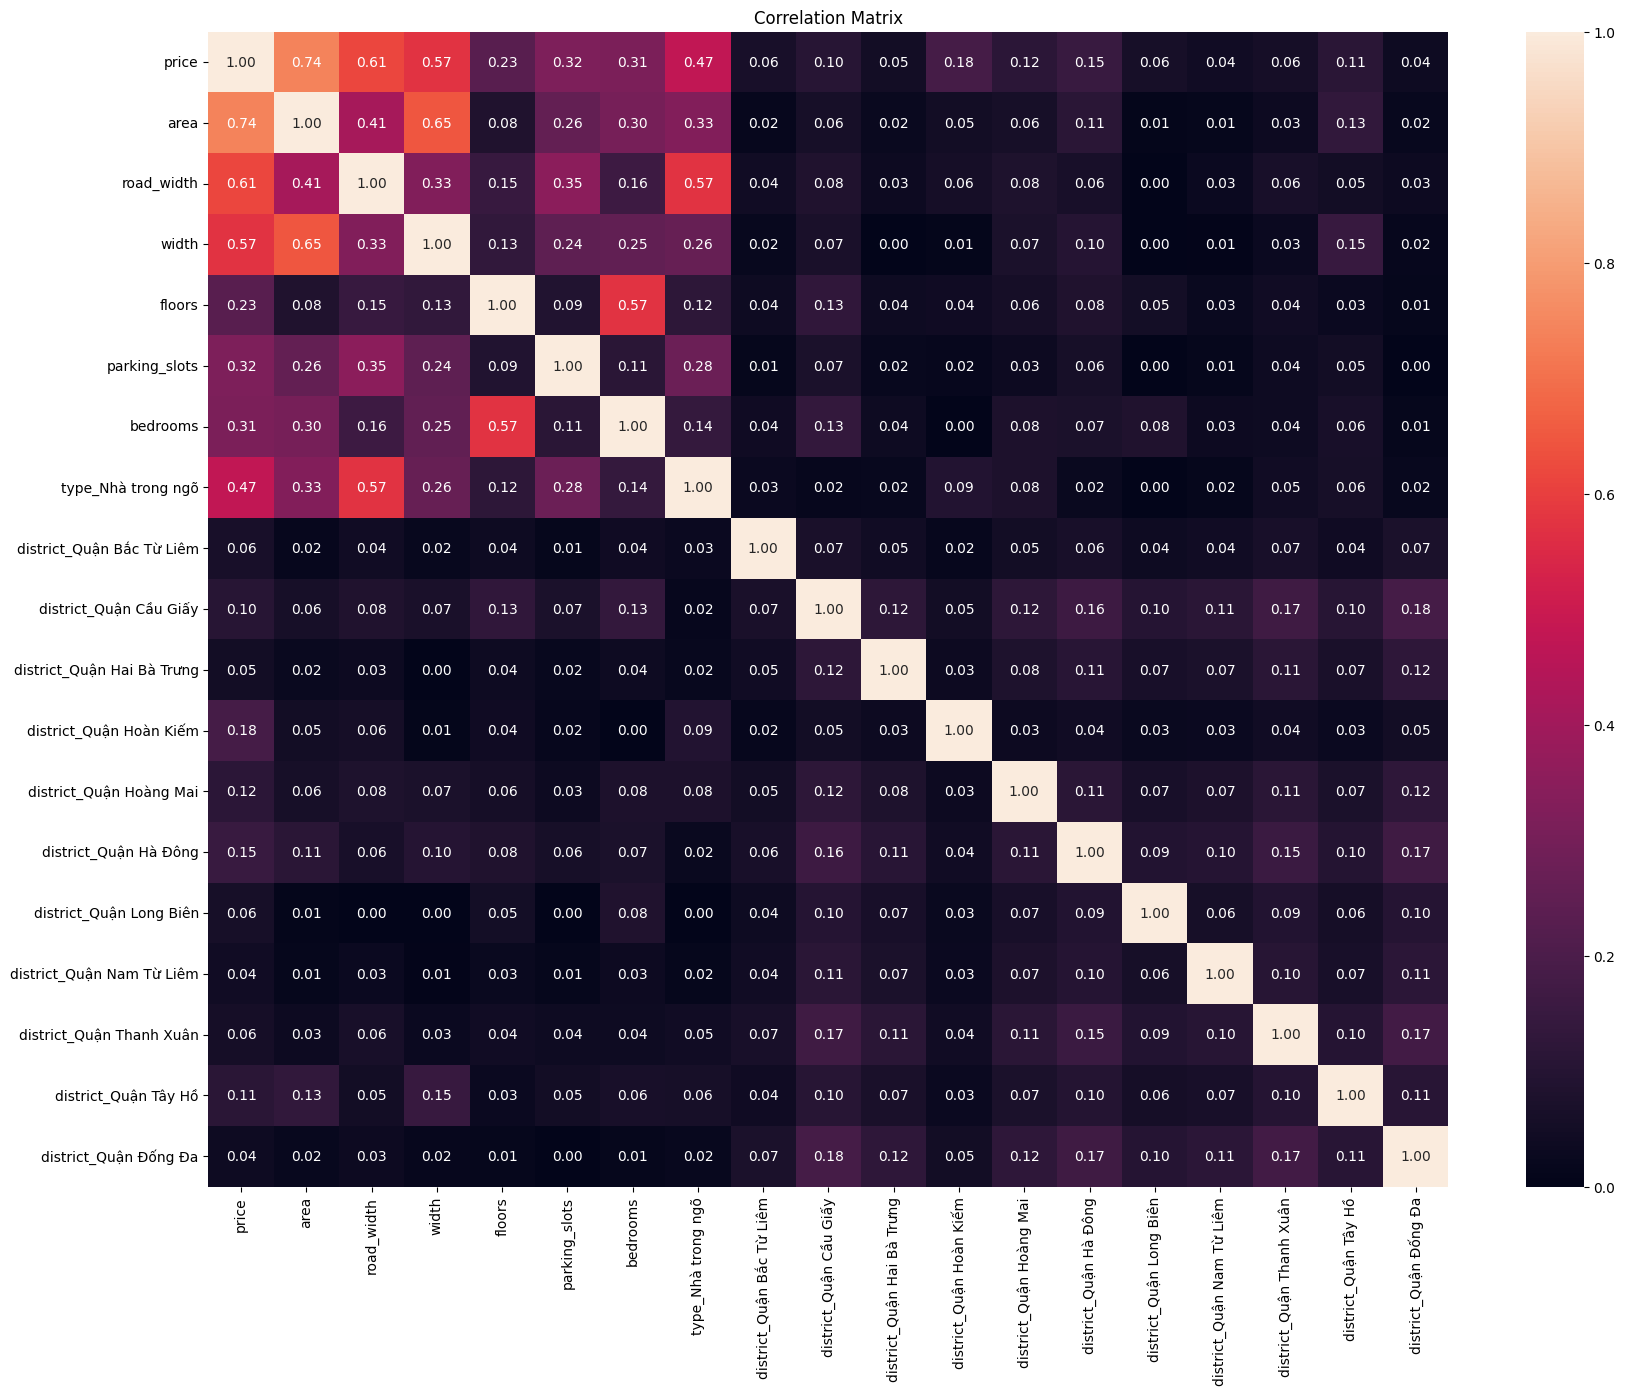

In [36]:
correlation_matrix = abs(df.corr())

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10}, fmt='.2f', vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()


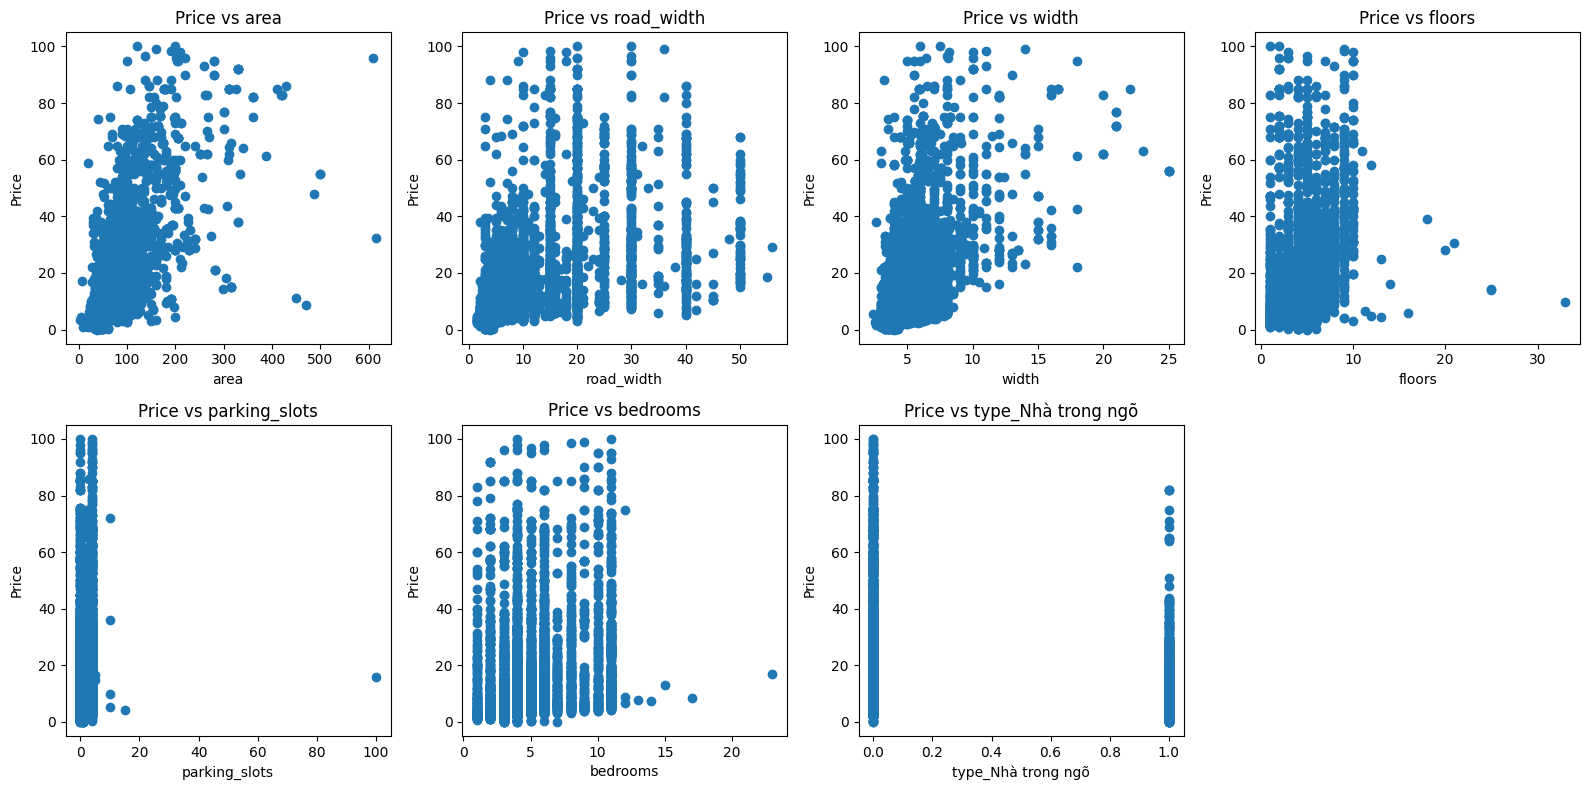

In [37]:
num_cols_to_plot = 7
fig = plt.figure(figsize=(16, 8))

for i in range(num_cols_to_plot):
    row = i // 4
    col = i % 4
    ax = fig.add_subplot(2, 4, i + 1)
    ax.scatter(df[df.columns[i + 1]], df['price'])
    ax.set_xlabel(df.columns[i + 1])
    ax.set_ylabel('Price')
    ax.set_title(f"Price vs {df.columns[i + 1]}")

plt.tight_layout()
plt.show()


In [38]:
# district_columns = [col for col in df.columns if col.startswith('district_')]

# df['district'] = df[district_columns].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# median_prices = df.groupby('district')['price'].median().sort_values(ascending=False)

# df['district'] = pd.Categorical(df['district'], categories=median_prices.index, ordered=True)
# df_sorted = df.sort_values('district')

# plt.figure(figsize=(12, 8))

# sns.boxplot(data=df_sorted, x='district', y='price', showfliers=False)
# plt.xlabel('Districts')
# plt.ylabel('Price')
# plt.title('Price Distribution across Districts (Sorted by Median Price)')
# plt.xticks(rotation=90)  
# plt.show()

# df = df.drop(columns='district')

In [39]:
df.to_csv('dataset.csv', index=False)
